## **Analyzing the Iris dataset using Python**

## Part 1  


### Import Python packages:

In [23]:

# packages will be updated according to the task progression.

import csv
# for dataframes 
import pandas as pd
# machine Learning Library that contains datasets.
import sklearn as skl 
# plotting library
import matplotlib.pyplot as plt
# python library for creating iterators to produce complex iterators.  
from itertools import combinations
# Data visualization library
import seaborn as sns

### Output a summary of each Iris dataset variable to a single text file  


* Load dataset  

Loading data' refers to the process of importing a dataset from an external source (such as a CSV file, web resource ..) into the programming environment  
Python then is used to open the file and store the information in a variable to be read and then used for analysis. 

In [24]:
# read iris dataset from current repository as a pandas data frame.
# the pandas frame will start with values, I need to add column names for better understanding
iris_data = pd.read_csv('iris dataset/iris.data')
#show
iris_data


,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [25]:
# identify the columns names
# refering to the documentation file 'iris.names' in this repository. see atributes, which are corresponding to a list of columns names.
column_names = ['sepal length in cm' , 'sepal width in cm' , 'petal length in cm' , 'petal width in cm', 'class']
column_names


['sepal length in cm',
 'sepal width in cm',
 'petal length in cm',
 'petal width in cm',
 'class']

In [26]:
# now that I identified the column names, I can add them so I can identify the columns easily.
iris_data = pd.read_csv('iris dataset/iris.data', names= column_names)
# show dataframe
iris_data


,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### Summary of dataset variables  

A summary of dataset variables, or, Descriptive Statistics Summary, provides metrics that help in understanding the main characteristcs of each variable within the data set. 

In [27]:
# summary of the 4 variables of Iris dataset.
# The describe() method returns description of the data in the dataframe. As the dataframe contains numerical data, the description contains these information for each column: 
# count, mean, std, min, 25%, 50%, 75%, max
iris_data.describe()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


* Create a Summary of each data set variable

In [28]:
# here I used for loop to actually loop through the columns in order to save them into txt files.
# reference : https://stackoverflow.com/questions/28218698/how-to-iterate-over-columns-of-a-pandas-dataframe#:~:text=We%20can%20use%20Python%27s%20list%20slicing%20easily%20to%20slice%20df.columns%20according%20to%20our%20needs.%20For%20eg%2C%20to%20iterate%20over%20all%20columns%20but%20the%20first%20one%2C%20we%20can%20do%3A

# I skip the class. I applied the negative indexing method.
for column in iris_data.columns[:-1]:  
    # summary of each column
    summary = iris_data[column].describe()
    # create a file for each column, add the file name and format
    # f-string formatting will generate a filename based on each column name.
    file_name = f"summary of {column}.txt"
    # open each file created previosuly, and overwrite the summary of each variable accordn=ingly
    with open(file_name, "w") as f:
        f.write(summary.to_string())

### Saving a histogram of each variable to png files  

*  <u>Definition of Histograms</u> 

' A histogram is a chart that plots the distribution of a numeric variable’s values as a series of bars.
Each bar typically covers a range of numeric values called a bin or class; a bar’s height indicates the frequency of data points with a value within the corresponding bin.'

Source [***Atlassian***](https://www.atlassian.com/data/charts/histogram-complete-guide)

*   Create Histograms


In [29]:
# to simplify the reading and coding, assign a variable for each feature of the data set.
sepal_length    = iris_data['sepal length in cm']
sepal_width     = iris_data['sepal width in cm']
petal_length    = iris_data['petal length in cm']
petal_width     = iris_data['petal width in cm']

In [30]:
# plot a histogram for each variable
# reference : https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html#:~:text=pyplot.hist(x%2C%20bins%3DNone%2C

# 1st histogram
plt.hist(sepal_length, ec='k', color='blue', alpha=0.6)
# add x label
# reference : https://matplotlib.org/stable/api/axes_api.html#axis-labels-title-and-legend:~:text=in%20increasing%20order.-,Axis%20labels%2C%20title%2C%20and%20legend,-%23
plt.xlabel("Sepal Length in cm")
# add y label
plt.ylabel("count")
# add title
plt.title("Sepal Length Distribution")
# save histogram in .png file 
# reference : # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html
plt.savefig("histogram of sepal length.png")
# clear the current figure, so there is no overlap when saving the rest of histograms
plt.clf()

# 2nd histogram
plt.hist(sepal_width, ec='k', color='green', alpha=0.6)
# add x label
plt.xlabel("Sepal Width in cm")
# add y label
plt.ylabel("count")
# add title
plt.title("Sepal Width Distribution")
# save
plt.savefig("histogram of sepal width.png")
#clear the current figure.
plt.clf()

# 3rd histogram
plt.hist(petal_length, ec='k', color='red', alpha=0.9)
# add x label
plt.xlabel("Petal Length in cm")
# add y label
plt.ylabel("count")
# add title
plt.title("Petal Length Distribution")
# save
plt.savefig("histogram of petal length.png")
##clear the current figure.
plt.clf()

# 4th histogram
plt.hist(petal_width, ec='k', color='orange', alpha=0.6)
# add x label
plt.xlabel("Petal Width in cm")
# add why label
plt.ylabel("count")
# add title
plt.title("Petal Width Distribution")
# save
plt.savefig("histogram of petal width.png")
#clear the current figure.
plt.clf()

<Figure size 640x480 with 0 Axes>

### Otput a scatter plot of each pair of variables

*   <u> Definition of a scatter plot</u>

*'A scatter plot (also scatter chart or scatter graph) uses dots to represent values for two different numeric variables.*  
*The position of each dot on the horizontal and vertical axis indicates values for an individual data point. Scatter plots are used to observe relationships between variables. '*

Source [***Atlassian***](https://www.atlassian.com/data/charts/what-is-a-scatter-plot)

*   Identify pairs count within data set variables

In [31]:
# finding how many pairs of variables before coding the scatter plots.
# I did manually find 6 pairs across al the 4 variables.
# I also looked up the documentation to try and find a function that generates the pairs count within a data set, this is helpful to manage larger data sets.

# The input list that I used to find the cominations.
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# imported in cell 1 itertools package to apply the combination methid into python.
# itertools helps to create and work with repeated or unique patterns from a given list.
# reference : https://docs.python.org/3/library/itertools.html#itertools.combinations
# reference : https://www.geeksforgeeks.org/python-itertools-combinations-function/

# to generate all possible combination.(length = 2) generates pairs where the order doesn't matter.
# reference : https://www.geeksforgeeks.org/python-itertools-combinations-function/#:~:text=%23%20generate%20all%20combinations%20of%20length%202
for i in combinations(columns, 2):
    print(i)

('sepal_length', 'sepal_width')
('sepal_length', 'petal_length')
('sepal_length', 'petal_width')
('sepal_width', 'petal_length')
('sepal_width', 'petal_width')
('petal_length', 'petal_width')


*   Create scatter plots 

Text(0, 0.5, 'Petal Width')

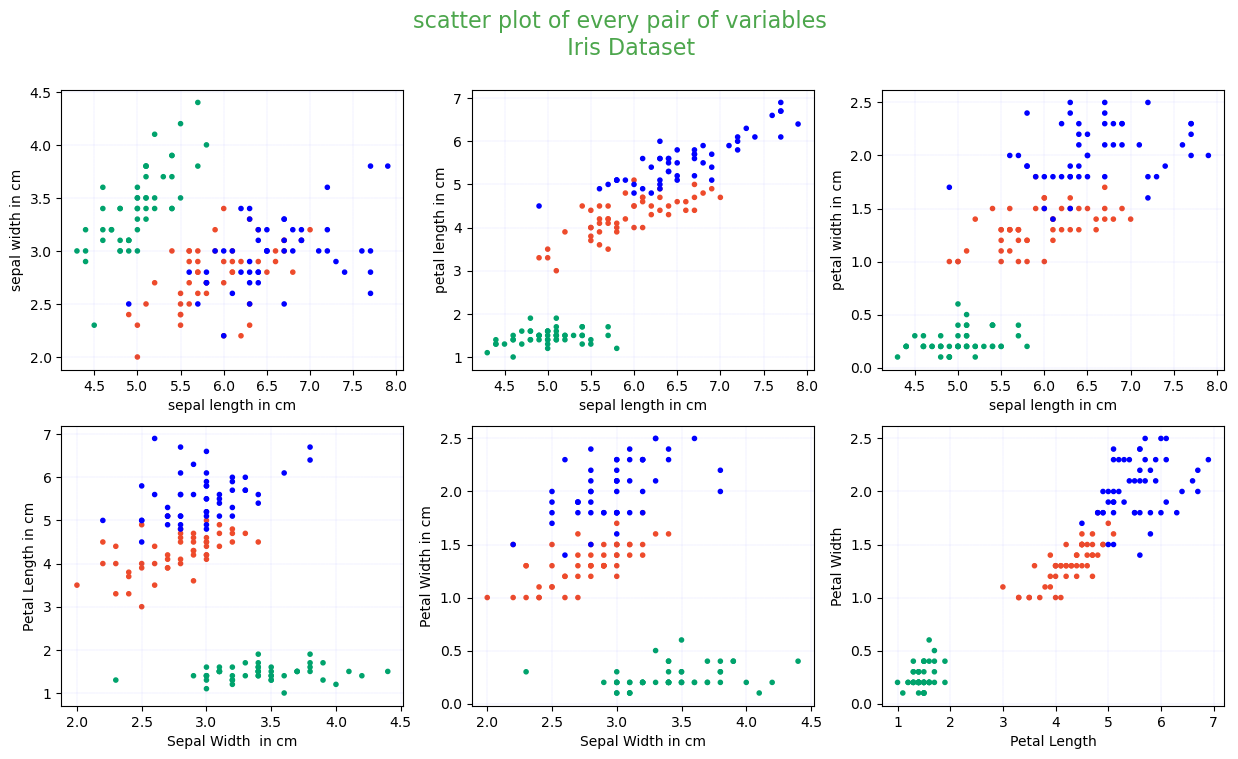

In [ ]:
# create a colorolor dictionary
# medium ref

# assigning colors to species
# reference : https://htmlcolorcodes.com/colors/
species_colors = {
    'Iris-setosa': '#00A36C',
    'Iris-versicolor': '#EE4B2B',
    'Iris-virginica': 'blue'
}
# slice the class column to colors
colors = iris_data['class'].map(species_colors)

# create a  grid of 2 rows 3 columns each (6 plots)
# reference : 
fig, axs = plt.subplots(2, 3, figsize=(15, 8), )
fig.suptitle('scatter plot of every pair of variables \n  Iris Dataset', size=16, c='g', alpha = 0.7)

# 1st plot (Scatter plot of Sepal Length vs Sepal Width ) in 1st row, 1st column , with color refernce to iris species
# reference : https://monayo.
axs[0, 0].scatter(sepal_length, sepal_width, marker='.',  c=colors)
# add a grid to simplfy repering the corresponding points
axs[0, 0].grid(color='blue', linestyle='--', linewidth=0.05)
# set x and y axis labels
axs[0, 0].set_xlabel('sepal length in cm')
axs[0, 0].set_ylabel('sepal width in cm')

# 2nd plot (Scatter plot of Sepal Length vs Petal Length) in 1st row
axs[0, 1].scatter(sepal_length, petal_length, marker='.',  c=colors)
axs[0, 1].grid(color='blue', linestyle='--', linewidth=0.05)
axs[0, 1].set_xlabel('sepal length in cm')
axs[0, 1].set_ylabel('petal length in cm')

# 3rd plot (Scatter plot of Sepal Length vs Petal Width) in 1st row,
axs[0, 2].scatter(sepal_length, petal_width, marker='.',  c=colors)
axs[0, 2].grid(color='blue', linestyle='--', linewidth=0.05)
axs[0, 2].set_xlabel('sepal length in cm')
axs[0, 2].set_ylabel('petal width in cm')

# 4th plot (Scatter plot of Sepal Width vs Petal Length) in 2nd row 
axs[1, 0].scatter(sepal_width, petal_length, marker='.',  c=colors)
axs[1, 0].grid(color='blue', linestyle='--', linewidth=0.05)
axs[1, 0].set_xlabel('Sepal Width  in cm')
axs[1, 0].set_ylabel('Petal Length in cm')

# 5th plot (Scatter plot of Sepal Width vs Petal Width ) in 2nd row 
axs[1, 1].scatter(sepal_width, petal_width, marker='.',  c=colors)
axs[1, 1].grid(color='blue', linestyle='--', linewidth=0.05)
axs[1, 1].set_xlabel('Sepal Width in cm')
axs[1, 1].set_ylabel('Petal Width in cm')

# 6th plot (Scatter plot of Petal Length vs Petal Width) in 2nd row,
axs[1, 2].scatter(petal_length, petal_width, marker='.',  c=colors)
axs[1, 2].grid(color='blue', linestyle='--', linewidth=0.05)
axs[1, 2].set_xlabel('Petal Length')
axs[1, 2].set_ylabel('Petal Width')

## Part 2
##### My personal approach to additional data processing methods   

---

### Pie Chart  
*   <u>Definition of Pie Charts</u>  

*'Pie charts are statistical graphs divided into slices that represent different data values and sum up to 100%.'*  

Source [***geeksforgeeks***](geeksforgeeks)



*   Create a pie chart of Iris species count 

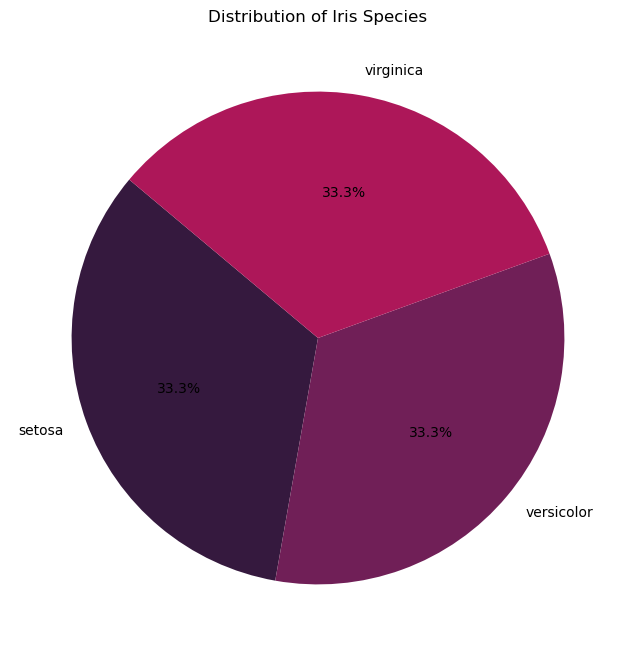

In [33]:
# Load the Iris dataset
iris = sns.load_dataset('iris')

# Count the number of instances for each species
species_counts = iris['species'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(species_counts, labels=species_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('rocket'))
plt.title('Distribution of Iris Species')
plt.show()

*   Analysis of Pie chart

# -

# -

### Boxplots

* <u>    Definition of Boxplots  </u>

*' A BoxPlot (or Whisker plot) displays the summary of a data set, including minimum, first quartile, median, third quartile and maximum. it consists of a box from the first quartile to the third quartile, with a line at the median.'*

Source [***geeksforgeeks***](https://www.geeksforgeeks.org/box-plot-in-python-using-matplotlib/)

*   Create Boxplots

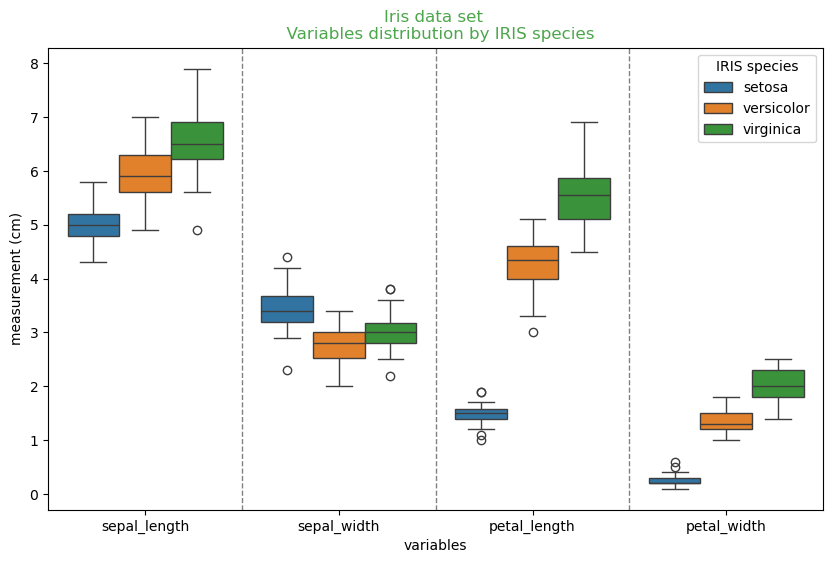

In [34]:
# learn the Seaborn pairplot method
# reference : https://seaborn.pydata.org/generated/seaborn.pairplot.html
# reference : 

# in the official documentation page, it is advised to load a .csv format dataset file.
# the same page refers to a using a repository containing sample datasets provided by Seaborn. The Iris dataset is in that list, which makes it a convenient target for the seaborn.load_dataset function.
# reference : 

# Seaborn library is previously imported (as sns).
# load dataset
iris_ds = sns.load_dataset('iris')

# melt the dataframe to long format, meaning, I need to convert the columns to rows.
# reference : 
# reference : 
iris_melted = pd.melt(iris_ds, id_vars='species', var_name='feature', value_name='measurement')

# create the boxplot
plt.figure(figsize=(10, 6))
# reference : 
sns.boxplot(x='feature', y='measurement', hue='species', data=iris_melted)

# draw vertical lines to separate iris data set variables visually. 
# reference : 
for x in [0.5,1.5,2.5]: 
    plt.axvline(x=x, color='gray', linestyle='--', linewidth=1)

# add title
plt.title('Iris data set \n  Variables distribution by IRIS species', c='g', alpha =0.7)
# set x and y labels
plt.xlabel('variables')
plt.ylabel('measurement (cm)')
# add meaningful legend
plt.legend(title='IRIS species')

*   <U>Analysis of Boxplots</u>

# -

# -

----

### Heatmaps

*   <u>Definition of Heatmaps</u>  

The heatmap is a graphical representation of data where individual values are represented by color intensity.  
In the heatmap, each row and column represent a numerical variable ,and, each cell depicts the relationship between the intersecting 
variables (their correlation).  

*   <u>Definition of correlation coefficients</u>    


*'Correlations is how one variable changes as the other changes.  This measure ranges from negative one to 
one.*  
*Negative one (-1) indicates a strong negative relationship (as one variable increases, the other decreases)
*     
*One (1) indicates a strong positive relationship (as one variable increases, the other also increases)*    
*Zero (0) indicates no relationship (the change of one variable is not related to the change of the other)
'*       

source [***Datacamp***](https://campus.datacamp.com/courses/introduction-to-python-in-power-bi/heatmaps-and-correlation-coefficients?ex=1)

*   <u>Create Heatmap for each Iris species</u>

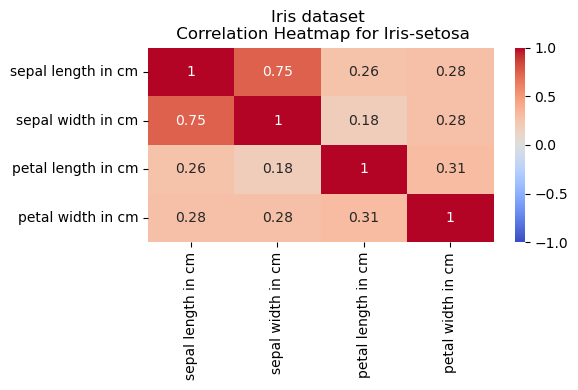

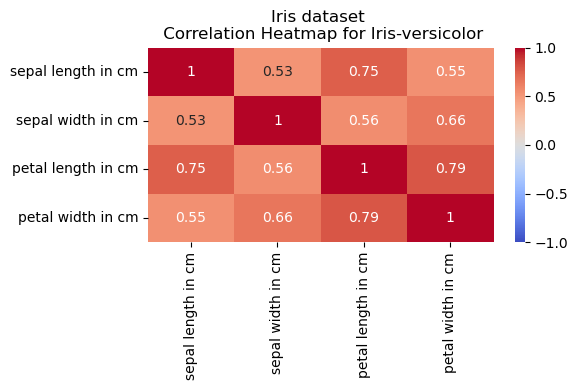

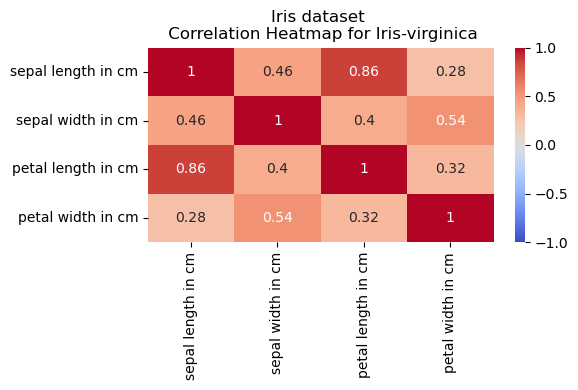

In [35]:
# identify the list of species ['setosa', 'versicolor', 'virginica']
species_list = iris_data['class'].unique() 

# loop through each species
for sp in species_list:
    # filter the dataset to only save rows of the actual species
    subset = iris_data[iris_data['class'] == sp]
    # calculate the correlation matrix
    # reference :
    corr = subset.drop('class', axis=1).corr()

    # plot heatmap  
    plt.figure(figsize=(6, 4))
    sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f'Iris dataset \n Correlation Heatmap for {sp.capitalize()}')
    plt.tight_layout()


*   <u> Analysis of Heatmaps</u>
# -
# -
#
#



  
    
      

---

### Pairplots :


*   <u> Pairplots definition</u>

'Seaborn Pairplot is a Python data visualization library that allows to plot pairwise relationships between variables within a dataset, making it easier to visualize and understand large data sets.
By default, the function will create a grid of Axes such that each numeric variable in data will be shared across the y-axes across a single row and the x-axes across a single column.
The diagonal plots are treated differently. As univariate distribution plot, it's drawn to show the marginal distribution of the data in each column.'

Source [***Seaborn***](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

* Create pairplots

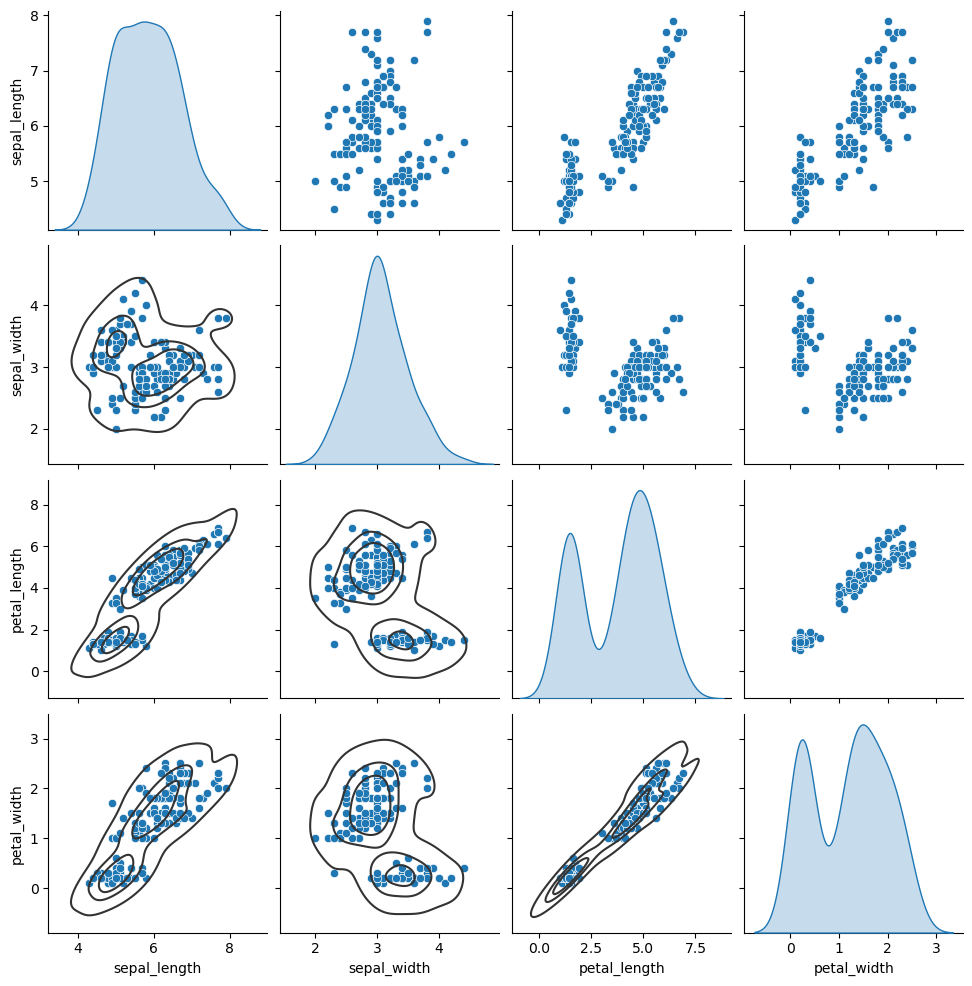

In [36]:
# reference : 
g = sns.pairplot(iris_ds, diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")

*   Analysis of pairplots

# -

# -

End